# Final Project: What variables do affect the number of violent crimes in the United States?

## UMD Spring 2017 CMSC 320

## Kitae Kim, UID: 112619947

## Due May 19th, 2017 on 10:29 AM

## Introduction
This turtorial will introduce to the process of a data analysis starting from gathering data, analyzing data, apply Regression models and performing a hypothesis testing on those model's and finally getting a reasonable output. We begin using a dataset from the FBI dataset about the total number of violent crimes in the US for 2014. The data consists of Police Agency, StateCode, Population, Violent Crime total and number of crimes that are Violent Crimes. Obviously, the total violent crime total is the sum of individual crimes such as Murder, Manslaugther, rape, Robbery, Aggravated assault.

I will use the variables State, Population, Violent crime total in this tutorial. The Violent crime total will be my variable of interest and variable Population is one attribute which will be further investigated on the affect of violent crimes

## Get a Dataset
The FBI dataset comes from https://www.bjs.gov/ucrdata/Search/Crime/Local/LocalCrime.cfm. Apparently we can get the data by one state so I actually combined 50 states beforehand.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Insert the Number of Violent Crime dataset
xl = pd.ExcelFile("Violent Crime.xlsx")
df = xl.parse("Sheet1")
df.head()

,Agency,State,Months,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault
0,Alabaster Police Dept,AL,12,31568.0,58.0,1,NaN,9.0,11,37
1,Albertville Police Dept,AL,12,21655.0,23.0,1,NaN,5.0,8,9
2,Alexander City Police Dept,AL,12,14887.0,81.0,1,NaN,8.0,8,64
3,Anniston Police Dept,AL,12,22567.0,536.0,4,NaN,42.0,77,413
4,Athens Police Dept,AL,12,24521.0,6.0,0,NaN,2.0,4,0


## Preprocessing a Dataset

We currently have a dataset that number of Violent Crime total by all police Agency in the United States. However, I want the dataset by State so I group the dataset by StateCode and summed all the number of violent crimes and created a new dataset called State_crime.

In [23]:
# Create array TotalCrimes and StateCode to store the sum by StateCode of number of violent crimes and StateCode
TotalCrimes = []
StateCode = []

for i, group in df.groupby('State'):
    TotalCrimes.append(group['Violent crime total'].sum())
    StateCode.append(i)
    
temp = {'StateCode':StateCode,
        'Total Number of Violent Crimes':TotalCrimes}

# Use the array TotalCrimes and StateCode to create a brand new dataset called State_crime
State_crime = pd.DataFrame(temp)

### Imputing values
Now I face a problem. There are many missing data from the population by police agency. Therefore, I do not believe I can trust the attribute Population in this dataset. To solve this problem I get a brand new dataset and add it to processed dataset. This is called imputing. There are many ways to impute data such as setting the value to zero or compare other data and set it some similar value using an algorithm. However, I chose to get another dataset from the U.S Census.

Link: https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

(type B02001: RACE, apparently Chrome can't get the actual data use some other browser).

This data contained estimated population by state and race from 2010 to 2016 but I preprocessed it on excel to just contain population for years 2014 and 2015. Obviously the source is from the U.S Census which is more credible than using computing algorithms to estimate the missing values.

When I got this data from this site I processed uncessary information such as margin of error through the options provided by the website.

### Population by state dataset
The newly imported dataset contains each state's population total and population by race such as White, Black, Asian and more. One of the reasons why I chose this dataset is to find if black people or hispanic people commit more violent crimes. The poulation by race will be used later to see if race actually affects the number of violent crimes.

Since I brought in a new dataset I need to process it so that it can match the State Crime dataset. I first get rid of all unneccesary data such as the US total population since I want it by state. Change the state name to state code and more.

In [24]:
# Insert the U.S population by state in 2014 dataset
pop = pd.read_csv('U.S Population 2014.csv')

# Drop unneccesary columns and rows
pop = pop.drop('Id', axis=1)
pop = pop.drop('Id2', axis=1)

# Get rid of United STates total and Puerto Rico
state = pop.copy(deep=True)
state = state[state.Geography != 'United States']
state = state[state.Geography != 'Puerto Rico']

# Change State name to State Code
for index, row in state.iterrows():
    if(row.Geography == 'Alabama'):
        state.set_value(index,'Geography','AL')
    elif(row.Geography == 'Alaska'):
        state.set_value(index,'Geography','AK')
    elif(row.Geography == 'Arizona'):
        state.set_value(index,'Geography','AZ')
    elif(row.Geography == 'Arkansas'):
        state.set_value(index,'Geography','AR')
    elif(row.Geography == 'California'):
        state.set_value(index,'Geography','CA')
    elif(row.Geography == 'Colorado'):
        state.set_value(index,'Geography','CO')
    elif(row.Geography == 'Connecticut'):
        state.set_value(index,'Geography','CT')
    elif(row.Geography == 'Delaware'):
        state.set_value(index,'Geography','DE')
    elif(row.Geography == 'District of Columbia'):
        state.set_value(index,'Geography','DC')
    elif(row.Geography == 'Florida'):
        state.set_value(index,'Geography','FL')
    elif(row.Geography == 'Georgia'):
        state.set_value(index,'Geography','GA')
    elif(row.Geography == 'Hawaii'):
        state.set_value(index,'Geography','HI')
    elif(row.Geography == 'Idaho'):
        state.set_value(index,'Geography','ID')
    elif(row.Geography == 'Illinois'):
        state.set_value(index,'Geography','IL')
    elif(row.Geography == 'Indiana'):
        state.set_value(index,'Geography','IN')
    elif(row.Geography == 'Iowa'):
        state.set_value(index,'Geography','IA')
    elif(row.Geography == 'Kansas'):
        state.set_value(index,'Geography','KS')
    elif(row.Geography == 'Kentucky'):
        state.set_value(index,'Geography','KY')
    elif(row.Geography == 'Louisiana'):
        state.set_value(index,'Geography','LA')
    elif(row.Geography == 'Maine'):
        state.set_value(index,'Geography','ME')
    elif(row.Geography == 'Maryland'):
        state.set_value(index,'Geography','MD')
    elif(row.Geography == 'Massachusetts'):
        state.set_value(index,'Geography','MA')
    elif(row.Geography == 'Michigan'):
        state.set_value(index,'Geography','MI')
    elif(row.Geography == 'Minnesota'):
        state.set_value(index,'Geography','MN')
    elif(row.Geography == 'Mississippi'):
        state.set_value(index,'Geography','MS')
    elif(row.Geography == 'Missouri'):
        state.set_value(index,'Geography','MO')
    elif(row.Geography == 'Montana'):
        state.set_value(index,'Geography','MT')
    elif(row.Geography == 'Nebraska'):
        state.set_value(index,'Geography','NE')
    elif(row.Geography == 'Nevada'):
        state.set_value(index,'Geography','NV')
    elif(row.Geography == 'New Hampshire'):
        state.set_value(index,'Geography','NH')
    elif(row.Geography == 'New Jersey'):
        state.set_value(index,'Geography','NJ')
    elif(row.Geography == 'New Mexico'):
        state.set_value(index,'Geography','NM')
    elif(row.Geography == 'New York'):
        state.set_value(index,'Geography','NY')
    elif(row.Geography == 'North Carolina'):
        state.set_value(index,'Geography','NC')
    elif(row.Geography == 'North Dakota'):
        state.set_value(index,'Geography','ND')
    elif(row.Geography == 'Ohio'):
        state.set_value(index,'Geography','OH')
    elif(row.Geography == 'Oklahoma'):
        state.set_value(index,'Geography','OK')
    elif(row.Geography == 'Oregon'):
        state.set_value(index,'Geography','OR')
    elif(row.Geography == 'Pennsylvania'):
        state.set_value(index,'Geography','PA')
    elif(row.Geography == 'Rhode Island'):
        state.set_value(index,'Geography','RI')
    elif(row.Geography == 'South Carolina'):
        state.set_value(index,'Geography','SC')
    elif(row.Geography == 'South Dakota'):
        state.set_value(index,'Geography','SD')
    elif(row.Geography == 'Tennessee'):
        state.set_value(index,'Geography','TN')
    elif(row.Geography == 'Texas'):
        state.set_value(index,'Geography','TX')
    elif(row.Geography == 'Utah'):
        state.set_value(index,'Geography','UT')
    elif(row.Geography == 'Vermont'):
        state.set_value(index,'Geography','VT')
    elif(row.Geography == 'Virginia'):
        state.set_value(index,'Geography','VA')
    elif(row.Geography == 'Washington'):
        state.set_value(index,'Geography','WA')
    elif(row.Geography == 'West Virginia'):
        state.set_value(index,'Geography','WV')
    elif(row.Geography == 'Wisconsin'):
        state.set_value(index,'Geography','WI')
    elif(row.Geography == 'Wyoming'):
        state.set_value(index,'Geography','WY')
    else:
        state.set_value(index,'Geography',row.Geography)


In [25]:
# Sort the state dataset and State_crime datase by StateCode to match those two dataset by StateCode index
state = state.sort_values(by='Geography',ascending=1)
state = state.rename(columns={'Geography': 'StateCode'})
state.head(n=5)

,StateCode,Population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:
2,AK,736732,483584,24790,103273,43915,8395,9967,62808
1,AL,4849377,3320273,1291826,22553,58456,1446,69859,84964
4,AR,2966369,2322472,468231,17091,36555,7148,50385,64487
3,AZ,6731484,5273335,280518,294757,212116,12721,433934,224103
5,CA,38802500,23814044,2259681,286631,5398090,150072,5114193,1779789


In [26]:
State_crime = State_crime.sort_values(by='StateCode',ascending=1)
State_crime.head(n=5)

,StateCode,Total Number of Violent Crimes
0,AK,4045.0
1,AL,15948.0
2,AR,10050.0
3,AZ,23245.0
4,CA,143917.0


## Exploration of Data

### Bar graph
After processing the violent crimes dataset and U.S population dataset, we need to explore how the dataset looks to have some insight about our attributes. There are many ways to do this but since my data are by state I used a bar graph where x axis is the statecode. By doing so I compare the distribution between population and number of violent crimes.

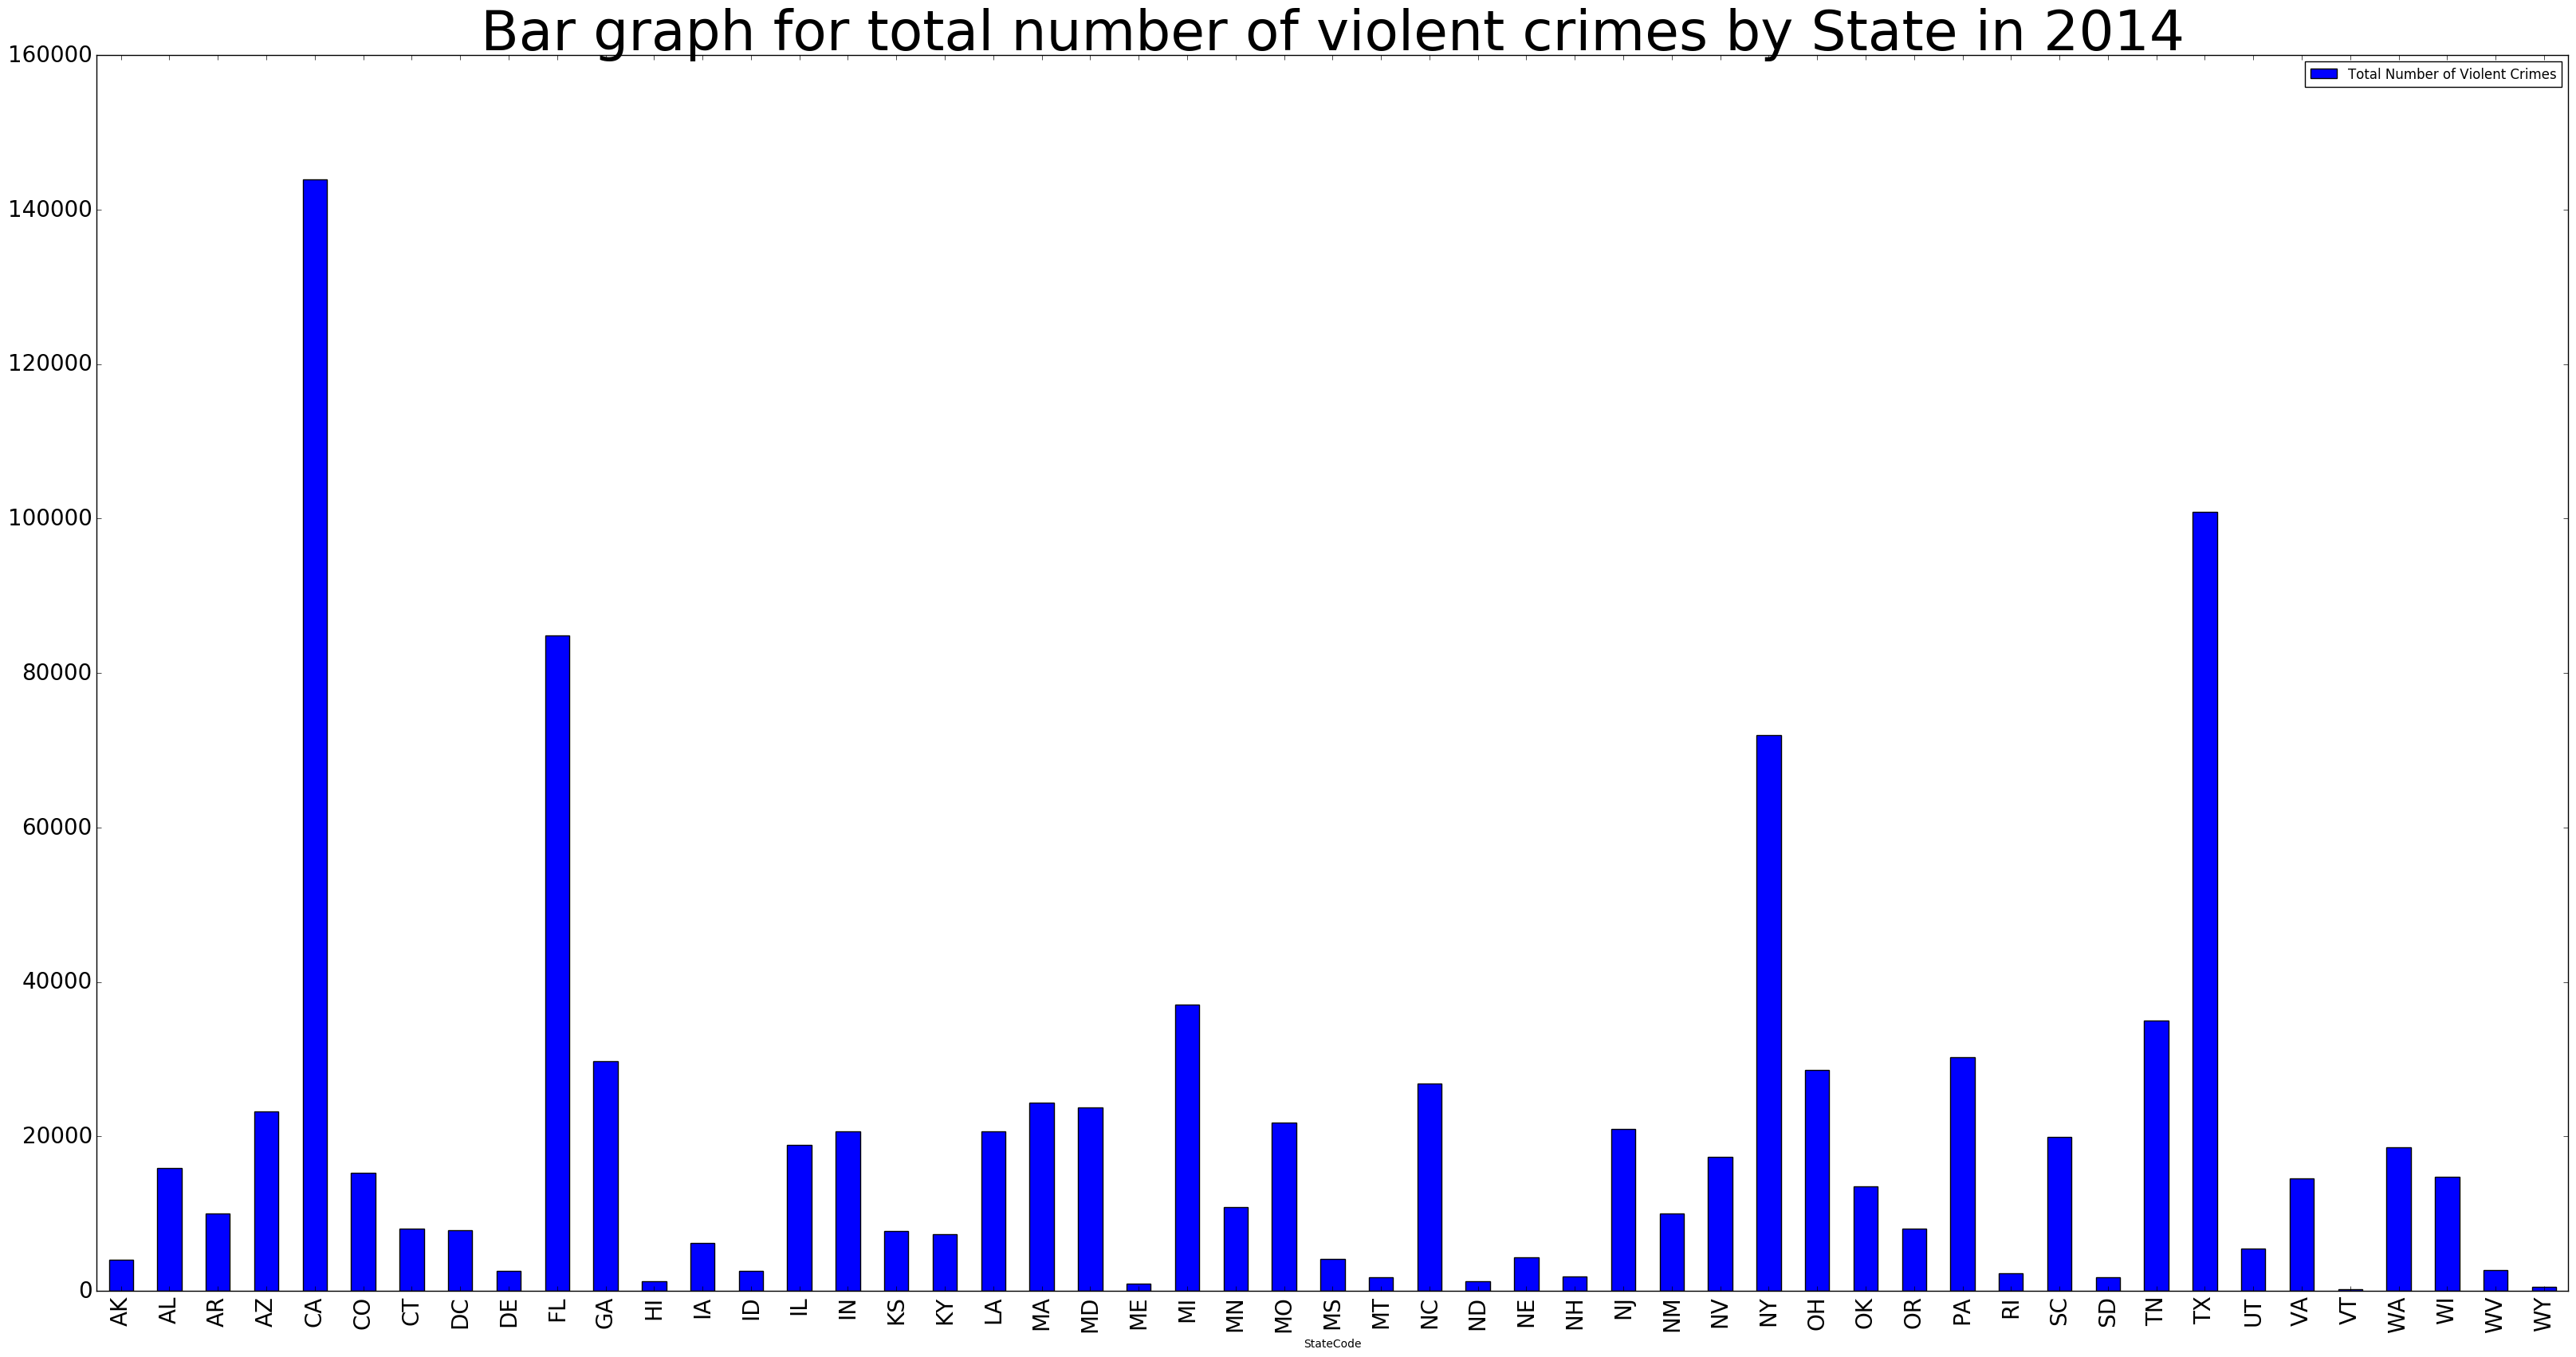

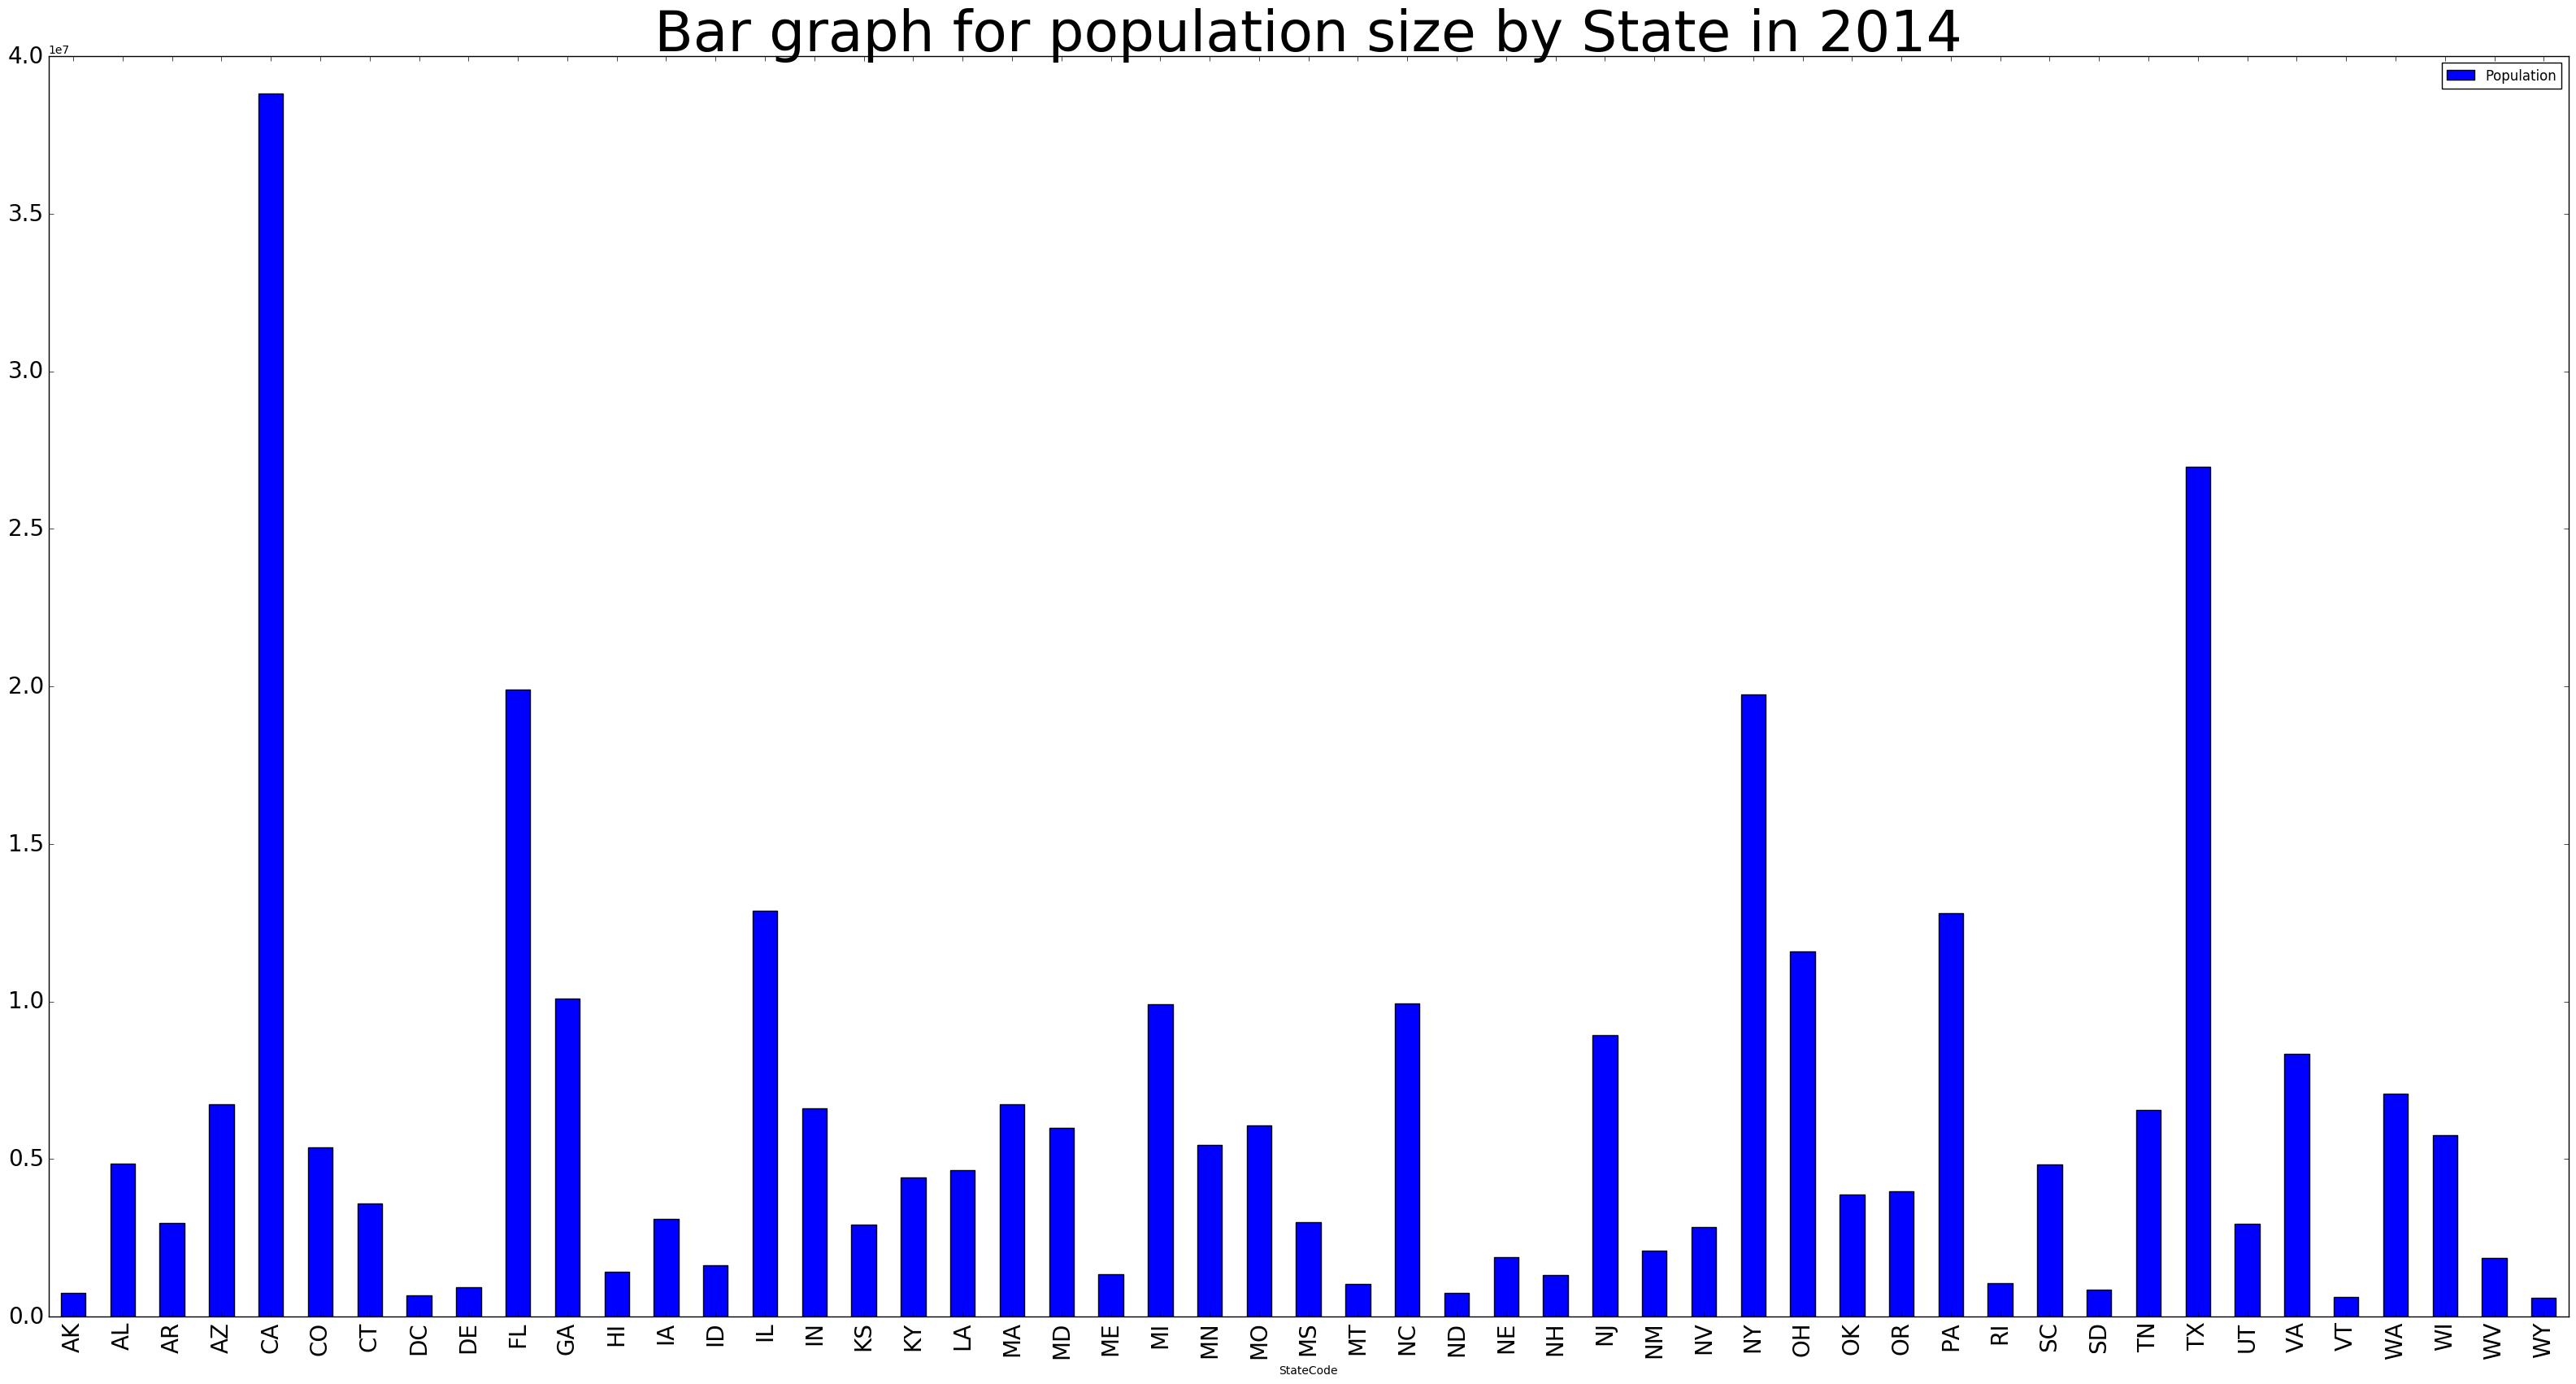

In [27]:
# Create figure and plot bargraphs where x axis is StateCode 
# and y axis is number of violent crimes by state and population size by state
fig1, plt1 = plt.subplots()
State_crime.plot.bar(x='StateCode',y='Total Number of Violent Crimes', ax=plt1, figsize=(40,20), fontsize=20)
plt.title("Bar graph for total number of violent crimes by State in 2014",fontsize=50)

fig2, plt2= plt.subplots()
state.plot.bar(x='StateCode',y='Population', ax=plt2, figsize=(40,20), fontsize=20)
plt.title("Bar graph for population size by State in 2014",fontsize=50)

### Pie chart

From the bargraph above we can roughly see that the population distribution is similar to the number of violent crimes distribution. However, since there are 50 states and DC each bar graph is too small which is hard to catch any difference. Another way to visualize it more easy is a pie chart. In a pie chart we can easily put labels and colors to clearly see the difference between the distibutions.

Information on how to plot pie chart and bar graphs: http://pandas.pydata.org/pandas-docs/stable/visualization.html

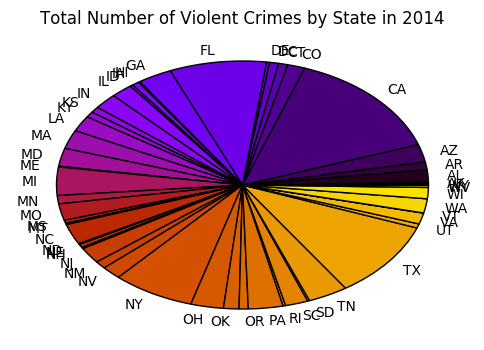

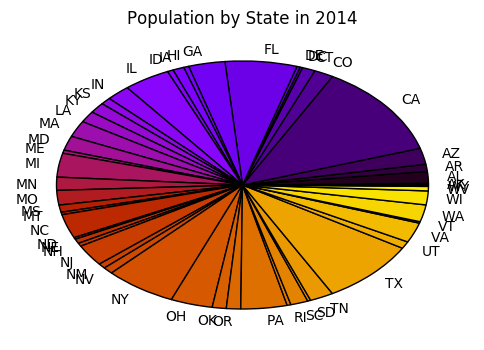

In [28]:
# Create a color map
cmap = plt.get_cmap('gnuplot')
# Assign sequential values between 0~51 representing each state's color
colors = [cmap(i) for i in np.linspace(0, 1, 51)]

# Plot Piecharts by state similar as bargraph with assigning the colors created from color map
fig3, ax3 = plt.subplots()
ax3.pie(State_crime['Total Number of Violent Crimes'],labels=State_crime['StateCode'], colors=colors)
plt.title('Total Number of Violent Crimes by State in 2014')

fig4, ax4 = plt.subplots()
ax4.pie(state['Population'],labels=state['StateCode'], colors=colors)
plt.title('Population by State in 2014')

plt.show()

We can see that most of the pichart the sections by state are similar between population and number of violent crimes by state. However, we can see a clear difference. For the StateCode IL(Illinois), FL(Florida) the number of violent crimes seems to be significantly lower compared to is population.

## GeoJSON/TopoJSON Overlays
We obviously can say that pie charts are easier to understand than bar graphs when there are too many states. However, even within the pie chart due to having 50 variables which makes it hard for us to understand without looking in depth. Therefore, since my data is by state I used a Map with each state colored depending on the attributes. The general colors are similar the only slight difference noticable is tennesse having a slightly darker coler for number of violent crimes verse population size


Information on geographical visualization: https://github.com/python-visualization/folium

In [29]:
import folium

#State data
state_geo = r'us-states.json'

# Plot Base Map
map = folium.Map(location=[48, -102], zoom_start=3)
# Let Folium determine the scale for the Number of violent crimes
map.choropleth(geo_path=state_geo, data=State_crime,
             columns=['StateCode', 'Total Number of Violent Crimes'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Number of Violent Crimes')
map

In [30]:
# Plot Base Map
map2 = folium.Map(location=[48, -102], zoom_start=3)
# Let Folium determine the scale for population size
map2.choropleth(geo_path=state_geo, data=state,
             columns=['StateCode', 'Population'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Population size by state')
map2

## Additional Processing

### Merging multiple datasets
In an ideal world we would like to have all our data in one file. However, in the real world it is rare for all data to be in one file. Therefore, we might need to combine datasets to become one datset for further processing. In pandas there is this merge function that can be easily used to merge two dataframes by a common attribute. For further information go to  http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

In [31]:
# Merge the state datset and State_crime dataset by the attribute StateCode
combine = pd.merge(state,State_crime, on='StateCode')
combine.columns = ['StateCode','Population','White','Black','Indian','Asian','Native','Other','Multiple','Crimes']
combine.head(n=5)

,StateCode,Population,White,Black,Indian,Asian,Native,Other,Multiple,Crimes
0,AK,736732,483584,24790,103273,43915,8395,9967,62808,4045.0
1,AL,4849377,3320273,1291826,22553,58456,1446,69859,84964,15948.0
2,AR,2966369,2322472,468231,17091,36555,7148,50385,64487,10050.0
3,AZ,6731484,5273335,280518,294757,212116,12721,433934,224103,23245.0
4,CA,38802500,23814044,2259681,286631,5398090,150072,5114193,1779789,143917.0


### Standardizing

Looking at the dataset above we can see that the scale for population and population by race's scale is significantly larger than the number of violent crimes. Therefore, it is not preferable to compare data with this dataset. One common way is to transform this dataset into a unitless values which is called standardizing. To standardize we need to first obtain the mean and the standard deviation of the attributes.

The basic mathmatical equations to get the mean and standard deviation are the following. However in pandas we can just use means and std function to get the mean and std for all attributes. As a reminder Z score represents the standardize value.

\begin{aligned}
X.mean = \frac{\sum_{i=1}^{n}Xi}{n} \\
X.standarddeviation = \frac{\sum_{i=1}^{n}(Xi-X.mean)^{2}}{n-1} \\
X.Zscore = \frac{Xi-X.mean}{X.std}
\end{aligned}

The standard deviation represents the spread from the mean where each record is lies. As a rule of thumb 4 standard deviation is the range of the values of attribute X's

For more information go to http://www.mathsisfun.com/data/standard-deviation.html

In [32]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# Standardizing corrupts the STateCode value since its a Categorical value so temporary drop the column
temp = combine.copy(deep=True)
temp.drop('StateCode',axis=1)

# Standardize the combined dataset using mean and std function
standardize = ((temp-temp.mean())/temp.std())

# Insert the StateCode variable again
standardize.StateCode = combine.StateCode
standardize.head(n=5)

,Asian,Black,Crimes,Indian,Multiple,Native,Other,Population,StateCode,White
0,-0.359629,-0.806615,-0.584520,0.734955,-0.466300,-0.086515,-0.373507,-0.774195,AK,-0.851750
1,-0.341169,0.525938,-0.141305,-0.400267,-0.384005,-0.324178,-0.295123,-0.196901,AL,-0.263009
2,-0.368973,-0.340244,-0.360921,-0.477083,-0.460064,-0.129163,-0.320609,-0.461220,AR,-0.470098
3,-0.146095,-0.537663,0.130403,3.427928,0.132805,0.061439,0.181362,0.067291,AZ,0.142339
4,6.437584,1.543839,4.623691,3.313646,5.911151,4.758986,6.306668,4.569115,CA,3.990371


When we look at the dataset above compared to the unstandardized data, the values are very small. To understand this data for example lets compare StateCode AZ(Arizona) and StateCode CA (California). For the Population value for Arizona the value is near 0 which means Arizona has a population close to the population mean by states in US. For California the value is 4.569 which means California has a population size significantly higher compared to other state's.

As a reminder the values indicate the number of standard deviations away from the mean. This is not saying that California has 4.569 times more the population compared other states.

## Linear Regression Analysis

A Linear Regression model gives out a equation which estimates the variable of interest using other variables. The equation is like Variable of interest = Coefficient0 + Coefficient1*Variable1 .... + Coefficientn*Variable n for n variables. For example, the next code shows how we can estimate the total number of violent crimes given the population size of a state by Crimes = Coefficient0 + Coefficent1*Population. There are many Linear Regression tools such as Skitlearn, statsmodels and more. For this tutorial I will use statsmodel because by using summary function we can get statistical data.

To learn more about linear regression go to https://onlinecourses.science.psu.edu/stat501/node/250

To know more methods to compute linear regression go to these sites

statsmodels: http://www.statsmodels.org/stable/regression.html

sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [33]:
import statsmodels.formula.api as sm

# Apply a model for Crimes = Constant0 + Constant1*Population
est = sm.ols(formula = 'Crimes ~ (Population)', data = standardize).fit()

# Print the summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     741.0
Date:                Thu, 18 May 2017   Prob (F-statistic):           3.06e-31
Time:                        23:01:47   Log-Likelihood:               -0.96404
No. Observations:                  51   AIC:                             5.928
Df Residuals:                      49   BIC:                             9.792
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.469e-17      0.035  -9.85e-16      1.000        -0.071     0.071
Population     0.9685      0.036     27.222      0.000         0.897     1.040
==============================================================================
Omnibus:                       15.733   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.378
Skew:                          -0.914   Prob(JB):                     1.87e-06
Kurtosis:                       6.012   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyze the Summary from Stats model output
There are many terms in this summary but we should focus on few which are important. 

#### R square value (1st Table)
First is the R-squared value. The R-squared value indicates the strength of fit of the model. Values be from 0 ~ 1 and if closer to 1 the strength is higher. For the example above, R-square value is 0.938 which is near 1 which show that the stength of the model is very high. However, this does not tell if the model is an appropriate model just tells us if it is a appropriate model this model can estimate 93.8 % of the data correctly

#### F-statistic and Prob (F-statistic) (1st Table)
The F-statistic tell us the strength of the coefficients of our linear equation. The F statistic value starts from 0 to a very high number. When the F statistic is near zero, we can say the all the coefficients being zero is very possible which proves that our model is less significant. Prob of F-statistic tell us the probability for all the coefficients to be zero. For our example above, F-statistic value is significantly higher than zero and Prob (F-statistic) is very low(near zero) which tell us our model is significant

#### Variable coefficients and P-value (2nd Table)
The 2nd table shows statistics on each variable in the linear regression equation. The Intercept is Coefficient0 which is a constant. Below the Intercept are variables we applied to the model. The example above shows Population as a variable. For each variable there is a coef value which is the coefficient value for each variable. Finally, the p-value as P>|t|. The p-value tells us if each coefficient for the variables are significant. If the p-value is higher than roughly 0.05 we can say the coefficient value is not significant. For the example above, the Intercept is 1 and Population is Zero. We can think that since the p-value is 1 which means that the intercept is not significant so there is a problem with this model. However, when we look at the coefficeint value is is -3.469 * 10^-17. This value is actually zero and if the value is zero it means the Intercept does not exist. 

### Conclusion on Linear Regression between Population and number of violent crimes
Since we have a high F-statistic, a R square value near 1 and low p-values we can conclude that a linear regression model is adequate to predict the number of violent crimes with the equation Crimes = 0.9685*Population. Obviously, our variaables are standardized so when we apply this equation to some other data we have to standardize using the standardized function we used above and unstandardize after getting the new Crimes. Unstandardizing will be explained later on in this tutorial

In [34]:
# Apply a model for all population for race variables
est2 = sm.ols(formula = 'Crimes ~ (White+Indian+Black+Asian+Native+Other+Multiple)', data = standardize).fit()

# Print the summary of the Regression results
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     114.0
Date:                Thu, 18 May 2017   Prob (F-statistic):           1.19e-25
Time:                        23:01:47   Log-Likelihood:                 3.9668
No. Observations:                  51   AIC:                             8.066
Df Residuals:                      43   BIC:                             23.52
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.469e-17      0.034  -1.02e-15      1.000        -0.069     0.069
White          0.3293      0.159      2.071      0.044         0.009     0.650
Indian        -0.0455      0.064     -0.709      0.482        -0.175     0.084
Black          0.1864      0.061      3.067      0.004         0.064     0.309
Asian         -0.8636      0.397     -2.175      0.035        -1.664    -0.063
Native         0.0013      0.078      0.017      0.987        -0.156     0.159
Other          0.8229      0.288      2.856      0.007         0.242     1.404
Multiple       0.5841      0.343      1.703      0.096        -0.108     1.276
==============================================================================
Omnibus:                       19.546   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.585
Skew:                          -0.837   Prob(JB):                     1.15e-13
Kurtosis:                       8.024   Cond. No.                         35.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Apply a model for variables White, Black, Asian, Other
est3 = sm.ols(formula = 'Crimes ~ (White+Black+Asian+Other+Multiple)', data = standardize).fit()

# Print the summary of the Regression results
est3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     164.7
Date:                Thu, 18 May 2017   Prob (F-statistic):           9.63e-28
Time:                        23:01:47   Log-Likelihood:                 3.6171
No. Observations:                  51   AIC:                             4.766
Df Residuals:                      45   BIC:                             16.36
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.469e-17      0.034  -1.03e-15      1.000        -0.068     0.068
White          0.3747      0.115      3.248      0.002         0.142     0.607
Black          0.1912      0.059      3.241      0.002         0.072     0.310
Asian         -0.6544      0.279     -2.348      0.023        -1.216    -0.093
Other          0.6821      0.219      3.119      0.003         0.242     1.123
Multiple       0.4502      0.189      2.386      0.021         0.070     0.830
==============================================================================
Omnibus:                       17.590   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.413
Skew:                          -0.732   Prob(JB):                     6.85e-12
Kurtosis:                       7.696   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion on Multi-Linear Regression equation beween Population by race verse number of violent crimes
For the first Multi Linear regression which contains all race variables we have a high F-statistic of 114 and a high R square of 0.949, the p-values for variable Indian and Native are 0.482, 0.987 which are significantly higher than 0.05 which means that the first Multi-Linear Regression model is not approrpiate. For the Second Multi-Linear Regression model uses all the race variables except the Native varible since it had the highest p-value from the previosu model. It turns out that this Regression model has a high R square value of 0.948, F statistic value of 164.7 and pvalues all significantly lower than 0.05. The Intercept has a pvalue of 1 but the coefficient value is very close to zero so it is negligible.

When we see the coeffiient values the highest coefficient value is the Other then Multiple and Asian has a negative coefficient values. This tell us that compared to blacks or white people other race such as hispanics affect the number of violent crimes more. Furthermore, the variable Asian has a coefficient value of -0.65 which tell us that the more the asians there are less violent crimes compared to communities consist with other race's.

## Other Machine learning Algorithms
From the prior Linear Regression Models we found that actually a linear regression for population by race verse number of Violent Crimes is less significant compared to just population verse number of Violent crimes. Does this mean that race has no relation with number of violent crimes? Well the answer is we do not know yet. There are many methods that can be used to find the relation between variables. It may be that population by race and number of violent crimes are related using those other methods.

### Decision Tree Regression
One reason why Linear Regression might not work is because not all of the variables do not have a relation with the variable of interest. In other words, some of the attributes do not affect the variable of interest at all. When we are trying to use too many variables and some of them having not much relation is called overfitting.  One way to prevent overfitting is using Decision trees.  A Decision Tree tries to find the minimal tree that can best predict variable of interest which reduces overfitting. A Decision Tree is a tree that splits depending upon an attributes value and at the leaf of the tree we get our predicted output. 

To understand more about Decision Tree's go to http://www.stat.cmu.edu/~cshalizi/350/lectures/22/lecture-22.pdf under Regression Trees.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.tree import DecisionTreeRegressor

# convert dataframe to an array using as_matrix()
X_pop = standardize['Population'].as_matrix()
X_race = standardize[['White','Indian','Black','Asian','Native','Other','Multiple']].as_matrix()
Y = standardize['Crimes'].as_matrix()

# Create a 5-fold cross validaation
crossvalidation = KFold(n=X_race.shape[0], n_folds=5,shuffle=True, random_state=4)

# Create a DecisionTreeRegressor
regression_tree = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=2,random_state=4)

# Fit the attributes and variable of interest in to the regression tree model
rt = regression_tree.fit(X_race,Y)

# Get the MSE score
score1 = np.mean(cross_val_score(regression_tree, X_race, Y,
 scoring='neg_mean_squared_error', cv=crossvalidation,
  n_jobs=1))

print('Mean squared error: %.3f' % abs(score1))

Mean squared error: 0.284


### K nearest neighbors
The approach behind Kn neighbors is to find the distance between records or other attriutes. To get the distance we use the Euclean distance or some other function. After getting those distances we group it by the distance k which indicate that those are similar data. One of the major problems with this is if K is too big we group too many records and if k is too small there are not much records. 

For further explanation go to https://www.cs.umd.edu/class/spring2017/cmsc320/lecs/cmsc320_s2017_lec18.pdf

To learn more about Machine learning methods go to the following sites:

K Neighbor: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

DecisionTree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

SVM: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Random Forest: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Lasso Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Logistic: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Stochiatic Gradient Descent: http://scikit-learn.org/stable/modules/sgd.html

In [37]:
from sklearn import neighbors

# Create a K Neighbor Regressor
regression_knn = neighbors.KNeighborsRegressor(3,weights='distance')

# Fit the attributes and variable of interest into the K Neighbor Regression
rk = regression_knn.fit(X_race,Y)

# Get the MSE score
score2 = np.mean(cross_val_score(regression_knn, X_race, Y, 
                scoring='neg_mean_squared_error', cv=crossvalidation,
                n_jobs=1))

print('Mean squared error: %.3f' % abs(score2))

Mean squared error: 0.240


### Compare Model's outcome.
For the two Machine learning algorithms above which are DecisionTreeRegressor and KNeighborsRegressor from Sklearn we us a technique called cross validation which divides the dataset by some integer c. From c we divide in to a training set and a test set (usually test set is 10~20% of c). We use the training set to get a regression model and the apply it to the test set to see how our fit is appropriate. The Mean square error scoring shows how much the estimated variable of interest is off compared to the actual variable of interest. 

For further explanation on cross validation go to : http://scikit-learn.org/stable/modules/cross_validation.html

About Scoring options go to : http://scikit-learn.org/stable/modules/model_evaluation.html


### Conclusion on the Example above
We can see that between DecisionTreeRegressor and KNeighborsRegressor, the MSE value 0.285 is higher than the MSE value of 0.240. However, since the difference is not by much we cannot be conclusive of which regression model is better.

## Compare several models using Hypothesis testing
Until now we have used several regression models which each has its own methods of confirming if the model is adequate or not. Then how do we compare several model's and choose the best one when each has its own way of confirming its adequacy? Here comes in Hypothesis testing. Hypothesis testing I will use is called a paired t-test. Until now we have 3 types of regression estimate which is linear, DecisionTree, and KNeighbors and 1 actual values of the variable of interest. By taking a difference between a estimator and the actual variable of interest we make a hypothesis that the difference is zero and get the statistic information. From the paired t-test the test statistic value(t-value) tells us how much we are off our estimation. If the t-value is 0 we are estimating correctly, if it is a positive integer we are overestimating and if it is a negative number we are under estimating. Another statistic value is the p-value which the probability of the null hypothesis being true. Conventionally if the p-value is below 0.05 we state that we can reject the null hypothesis (pvalue ranges from 0~1). 

For more about Hypothesis testing go to https://onlinecourses.science.psu.edu/statprogram/node/138

### Unstandardizing
The regression model predicts the standardized value of the variable of interest. Therefore, we have to unstandardize this value to get the actual prediction by reverse engineering the standardizing function.

\begin{aligned}
Xi = (Xi.Zscore * X.std) + X.mean
\end{aligned}

In [38]:
from scipy.stats import ttest_1samp

# Unstandardize the prediced values from each Regression Model

# For Decision Tree regression
rt_y = rt.predict(X_race)*temp['Crimes'].std()+temp['Crimes'].mean()

# For K Neighbor Regression
rk_y = rk.predict(X_race)*temp['Crimes'].std()+temp['Crimes'].mean()

# For Linear Regression
lin_y = est.predict(standardize)*temp['Crimes'].std()+temp['Crimes'].mean()

# For Multi Linear Regression
Mlin_y = est3.predict(standardize)*temp['Crimes'].std()+temp['Crimes'].mean()

# Real value for number of violent crimes
act_y = combine['Crimes'].as_matrix()

# Hypothesis test between Linear Regression verse actual data
t_stat0, p_val0 = ttest_1samp(lin_y-act_y,0)
print("Linear Regression Statistics t value:",t_stat0,"p-value", p_val0)

t_stat1, p_val1 = ttest_1samp(Mlin_y-act_y,0)
print("Multi-Linear Regression Statistics t value:",t_stat1,"p-value", p_val1)

# Hypothesis test between treeRegression verse actual data
t_stat2, p_val2 = ttest_1samp(rt_y-act_y,0)
print("Decision tree Regression Statistics t value:",t_stat2,"p-value", p_val2)


# Hypothesis test between knn neighbor verse actual data
t_stat3, p_val3 = ttest_1samp(rk_y-act_y,0)
print("K Nieghbor Regression Statistics t value:",t_stat3,"p-value", p_val3)

Linear Regression Statistics t value: -6.85493114788e-16 p-value 1.0
Multi-Linear Regression Statistics t value: 2.08310643043e-16 p-value 1.0
Decision tree Regression Statistics t value: -3.31471012744e-16 p-value 1.0
K Nieghbor Regression Statistics t value: 1.42857142857 p-value 0.159344932064


### Conclusion on the Hypothesis testing
Since all p-values are above 0.05 we can not reject the null hypothesis which show that all 4 regression model's are adequate. To pick the best Model we have to look at the t value. Since the t-value for the three linear regression, Multi-Linear regression and Decisiontree Regression are very close to 0 we can conclude both linear regression and Decisiontree are adequate models. However, linear regression just uses the population total as an attribute while the Decision tree uses population by race which is up to 7 variables. Since using one variable has the same result as using 7 variables we can conclude race does not affect the number of violent crimes for each state in 2014.

## What can we do with our Regression model's
We have 4 regression models that predict the number of violent crimes given population size or population size by race how can we use this Regression model? Well lets see if we can apply this model to different years so I brought in two more dataset which is the number of violent crimes in 2013 for state's California, Florida, Illinois, Maryland, and Virginia and the population data for those state's. I get the population dataset similar from before. 

2013 FBI DATASET: https://www.bjs.gov/ucrdata/Search/Crime/Local/LocalCrime.cfm

2013 Population Dataset: https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

### Preprocessing

In [39]:
# 2013 Violent Crime dataset
csv1 = pd.read_csv("Violent Crime 2013.csv")

# Preprocess to get number of violent crimes by state
TotalCrimes1 = []
StateCode1 = []

for i, group in csv1.groupby('State'):
    TotalCrimes1.append(group['Violent crime total'].sum())
    StateCode1.append(i)
    
temp1 = {'StateCode':StateCode1,
        'Total Number of Violent Crimes':TotalCrimes1}

State_crime1 = pd.DataFrame(temp1)
State_crime1.columns = ['StateCode','Crimes']
State_crime1.head()

,StateCode,Crimes
0,CA,144451.0
1,FL,85026.0
2,IL,20261.0
3,MD,24521.0
4,VA,14524.0


In [40]:
# 2013 State's population for State: California, Florida, Illinois, Virginia and Maryland
state_pop = pd.read_csv('State Population 2013.csv')
state_pop = state_pop.drop('Id', axis=1)
state_pop = state_pop.drop('Id2', axis=1)

# Change state name to state code
for index, row in state_pop.iterrows():
    if(row.Geography == 'Florida'):
        state_pop.set_value(index,'Geography','FL')
    elif(row.Geography == 'Illinois'):
        state_pop.set_value(index,'Geography','IL')
    elif(row.Geography == 'Maryland'):
        state_pop.set_value(index,'Geography','MD')
    elif(row.Geography == 'Virginia'):
        state_pop.set_value(index,'Geography','VA')
    elif(row.Geography == 'California'):
        state_pop.set_value(index,'Geography','CA')
    else:
        state_pop.set_value(index,'Geography',row.Geography)

state_pop.columns = ['StateCode','Population','White','Black','Indian','Asian','Native','Other','Multiple']
state_pop

,StateCode,Population,White,Black,Indian,Asian,Native,Other,Multiple
0,CA,38332521,23741019,2269021,278377,5210236,142782,4961376,1729710
1,FL,19552860,14897782,3141552,50379,509588,8241,486005,459313
2,IL,12882135,9362416,1833560,25575,635385,3660,732177,289362
3,MD,5928814,3416335,1754964,17230,354430,3053,213342,169460
4,VA,8260405,5726886,1592426,19615,484497,5808,162662,268511


## Standardize
Since we are using model from the 2014 datasets we have to use mean and std from the 2014 datsets to standardize

In [41]:
new_combine = pd.merge(state_pop,State_crime1, on='StateCode')
SC = new_combine.StateCode

# Reminder use the standardize equation from 2014 datasets not the 2013 datsets
standardize1 = ((new_combine-temp.mean())/temp.std())
standardize1.drop('StateCode', axis=1)
standardize1.StateCode=SC
standardize1

,Asian,Black,Crimes,Indian,Multiple,Native,Other,Population,StateCode,White
0,6.199100,1.553662,4.643575,3.197565,5.725140,4.509660,6.106669,4.503144,CA,3.975215
1,0.231551,2.471310,2.430852,-0.008930,1.006454,-0.091781,0.249510,1.867034,FL,2.139845
2,0.391252,1.095684,0.019292,-0.357766,0.375199,-0.248456,0.571688,0.930661,IL,0.991007
3,0.034575,1.013024,0.177915,-0.475128,-0.070158,-0.269216,-0.107339,-0.045380,MD,-0.243072
4,0.199697,0.842082,-0.194329,-0.441586,0.297751,-0.174993,-0.173667,0.281907,VA,0.236471


In [42]:
# Convert dataframe to arrays for each attribute
X_pop_new = standardize1['Population'].as_matrix()
X_race_new = standardize1[['White','Indian','Black','Asian','Native','Other','Multiple']].as_matrix()

# Apply prediction and unstandardize it to get the prediction for true 
Reg_pred = rt.predict(X_race_new)*temp['Crimes'].std()+temp['Crimes'].mean()

Knn_pred = rk.predict(X_race_new)*temp['Crimes'].std()+temp['Crimes'].mean()

Lin_pred = est.predict(standardize1)*temp['Crimes'].std()+temp['Crimes'].mean()

MLin_pred = est3.predict(standardize1)*temp['Crimes'].std()+temp['Crimes'].mean()

Real_Y = new_combine['Crimes'].as_matrix()

# Hypothesis test between Linear Regression verse actual data
t_0, p_0 = ttest_1samp(Lin_pred-Real_Y,0)
print("Linear Regression Statistics t value:",t_0,"p-value", p_0)

t_1, p_1 = ttest_1samp(MLin_pred-Real_Y,0)
print("Multi-Linear Regression Statistics t value:",t_1,"p-value", p_1)

# Hypothesis test between treeRegression verse actual data
t_2, p_2 = ttest_1samp(Reg_pred-Real_Y,0)
print("Decision Tree Regression Statistics t value:",t_2,"p-value", p_2)


# Hypothesis test between knn neighbor verse actual data
t_3, p_3 = ttest_1samp(Knn_pred-Real_Y,0)
print("K Neighbor Regression Statistics t value:",t_3,"p-value", p_3)

Linear Regression Statistics t value: 0.162379852898 p-value 0.878879497609
Multi-Linear Regression Statistics t value: 0.102190106288 p-value 0.923523707081
Decision Tree Regression Statistics t value: -1.41149437112 p-value 0.230940898027
K Neighbor Regression Statistics t value: -1.30335288044 p-value 0.262411635822


### Prediction on 2013 data
All the p-values are significantly higher than 0.05 which prevents us from rejecting the null hypothesis that the difference is zero. However, the t value for the linear regression and Multi linear regression is very close to zero compared to the other t values. Since by a small margin the Multi Linear Regression has a smaller t value and a higher p-value so we can state that this Multi Linear Regression model is a better model than the liner regression model by population size. However, since the t value and p-value are not that different we can state that the dominant factor which affects the number of violent crimes is the population total by state. Even though the dominant factor is the total population size, race affects the number of violent crimes but my assumption from before that the more black population increasing the number of violent crimes is false. Furthermore, the increase of Asian population acts as a suppressant for number of violent crimes.

## Conclusion
   To get meaningful output from data first we need dataset itself to be credible. There are many situations where the data itself is not credible which requires us to search more credible data from other sources or handle corrupted or missing data. For the analysis above, it turned out that the population size is dominent factor but race also slightly affecting the number of violent crimes. However, the race variable itself is a portion of the population which is a reason why the race variable slightly affects number of violent crimes. By a different approach of using median income by race in states it might be more clear to see how the variabe race affects number of violent crimes. 
   
   For the race attribute's that were used in this analysis, the Indian variable led to overfitting in the multi linear regression model and I had to manually exclude it to get an appropriate model. Therefore, choosing the right attributes are important. However, that does not mean we should have the fewest possible. There are many regression Model's that can prevent overfitting. Therefore, having more data is better than having less data. 
   
   For Regression Methods there are many ways to analyze a model's appropriateness. The fastest way is to compare scores from one regression model to another if available. However, if not available(requires manual coding) we can perform a hypothesis test on the difference between the predicted and actual value for the variable of interest by setting the null hypothesis as equal to zero. 
   
   For most of the derived conclusions we do not get the expected answer even though it may be obvious. Then we have to start over from data collection to get a meaningful output. One possible approach after the analysis above is to use the median income instead of race or use both median income and race. To do this approach we have to start from the beginnning to acquire that dataset, process it, apply Regression Model's and get a new conclusion. Therefore, to truly get a meaningful conclusion we have to continuously go back and forth among finding a question, acquiring data, process and analyize data and getting the conclusion.

## Links

### Statistical knowledge
Standardization: http://www.mathsisfun.com/data/standard-deviation.html<br>
Hypothesis testing: https://onlinecourses.science.psu.edu/statprogram/node/138<br>
Linear Regression:  https://onlinecourses.science.psu.edu/stat501/node/250<br>

### Pandas Dataframe functions and plotting functions
Piechar, bar chart etc: http://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
Merge: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html<br>


### Machine Learning information
KNN https://www.cs.umd.edu/class/spring2017/cmsc320/lecs/cmsc320_s2017_lec18.pdf<br>

### Machine Learning Algorithm modules
statsmodels: http://www.statsmodels.org/stable/regression.html<br>
Linear Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
K Neighbor: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html<br>
DecisionTree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
SVM: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
Random Forest: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
Lasso Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html<br>
Logistic: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
Stochiatic Gradient Descent: http://scikit-learn.org/stable/modules/sgd.html<br>

### Dataset
FBI Datasets on number of violent crimes: https://www.bjs.gov/ucrdata/Search/Crime/Local/LocalCrime.cfm<br>
Click one year of data, click state, click download <br>
Population Dataset from U.S Census: https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t<br>
Go to Advanced Search, Type B02001: RACE, Type options State, United States etc.
